In [1]:
# Common imports
import csv
import os
import sys
# Scikit-Learn ≥0.20
import sklearn
# numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
with open('./breast_cancer_data/breast_cancer.data.norm') as csv_file:
    bc_data_norm = np.loadtxt(csv_file, delimiter=",")

print("bc_data_norm shape, dtype = ",
      bc_data_norm.shape,
      bc_data_norm.dtype
)

bc_data_norm shape, dtype =  (569, 31) float64


In [3]:
# extract the first 30 columns as features X
X = bc_data_norm[:, :-1]
print("X.shape, X.dtype = ", X.shape, X.dtype)
print("X[0] = ", X[0])

# extract the last column as label y
y = bc_data_norm[:, -1:].astype(np.int)
# a 1d array was expected. Please change the shape of y to (n_samples, )
y = y.ravel()
print("y.shape, y[:5], y.dtype = ", y.shape, y[:5], y.dtype)
print("=== X and y extraction done ===")

X.shape, X.dtype =  (569, 30) float64
X[0] =  [0.52106  0.022691 0.545992 0.363733 0.597495 0.792661 0.703834 0.732443
 0.68794  0.613636 0.35638  0.120664 0.369063 0.273813 0.1875   0.355705
 0.137783 0.314126 0.320388 0.210702 0.620789 0.141547 0.668312 0.450698
 0.603675 0.619657 0.568955 0.912329 0.599252 0.422801]
y.shape, y[:5], y.dtype =  (569,) [0 0 0 0 0] int64
=== X and y extraction done ===


In [4]:
# Class Distribution: 212 - Malignant, 357 - Benign
np.testing.assert_equal(np.count_nonzero(y==1), 357)
# benign class is 1
np.testing.assert_equal(np.count_nonzero(y==0), 212)
# malignant class is 0

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt

# split the train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

In [6]:
print("X_train.shape, X_test.shape = ", X_train.shape, X_test.shape)
print("y_train.shape, y_test.shape = ", y_train.shape, y_test.shape)

X_train.shape, X_test.shape =  (455, 30) (114, 30)
y_train.shape, y_test.shape =  (455,) (114,)


## Logistic Regression Classifier with sklearn

clf.classes_ =  [0 1]
x_test's first 3 predicted probabilities = 
 [[0. 1.]
 [1. 0.]
 [1. 0.]]
cm =
 [[40  3]
 [ 7 64]]
              precision    recall  f1-score   support

   Malignant       0.85      0.93      0.89        43
      Benign       0.96      0.90      0.93        71

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


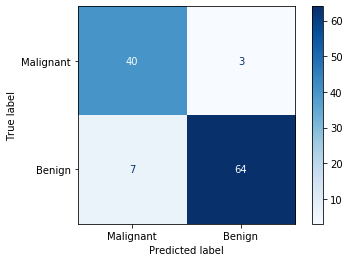

In [7]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(
    random_state=42,
    verbose=10,
    penalty='none',  # If ‘none’, no regularization is applied.
    max_iter=3000,
).fit(X_train, y_train)

# show the classes
print("clf.classes_ = ", clf.classes_)

# The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥)
# The second column is the probability that the output is one, or 𝑝(𝑥).
print("x_test's first 3 predicted probabilities = \n", clf.predict_proba(X_test)[:3])

# get actual predicted class
y_pred = clf.predict(X_test)

# show the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("cm =\n", cm)
plot_confusion_matrix(
    clf, X_test, y_test,
    display_labels=['Malignant', 'Benign'],
    cmap=plt.cm.Blues,
)
target_names = ['Malignant', 'Benign']
print(classification_report(y_test, y_pred, target_names=target_names))

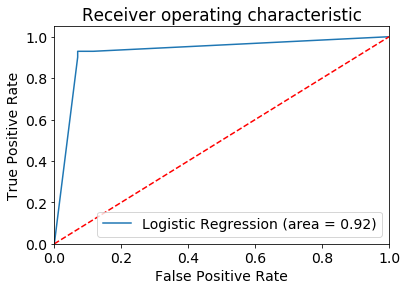

In [8]:
# code taken from tutorial:
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

# need to use predict, not predict_proba!
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
# print("thresholds = ", thresholds)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

0.9272846380609236


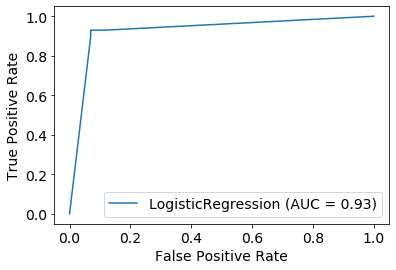

In [9]:
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show() 

=============== Loss Array ===============
[0.435988 0.26135  0.219511 0.194076 0.177395 0.164281 0.155296 0.147134
 0.141689 0.13557  0.131222 0.126092 0.122581 0.121442 0.118202 0.115474
 0.114202 0.110896 0.110314 0.107205 0.106196 0.104459 0.102673 0.101711
 0.100832 0.098676 0.097529 0.096862 0.096067 0.094788 0.094723 0.09282
 0.092951 0.092331 0.090587 0.090596 0.090576 0.089817 0.088129 0.087762
 0.087549 0.085822 0.085195 0.085824 0.08539  0.085503 0.084078 0.083377
 0.083517 0.082951 0.080112 0.082195 0.081274 0.08195  0.080634 0.080417
 0.080348 0.079605 0.07948  0.079268 0.078102 0.079065 0.078149 0.078419
 0.077539 0.077697 0.077271 0.076647 0.076295 0.075133 0.076389 0.075545
 0.075293 0.075152 0.075354 0.074712 0.074412 0.073929 0.074022 0.073916
 0.073896 0.073034 0.072109 0.072839 0.072093 0.072621 0.071132 0.072859
 0.070276 0.071128 0.070255 0.070301 0.0705   0.071253 0.071242 0.070971
 0.070796 0.069919 0.068038 0.068932]


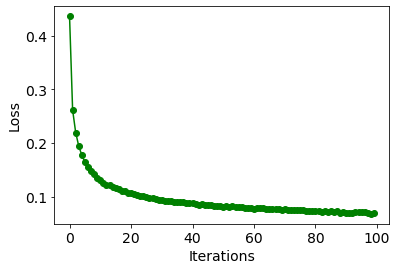

In [10]:
# adapted and updated the answer from @OneRaynyDay
# from https://stackoverflow.com/questions/44443479/python-sklearn-show-loss-values-during-training

import sys
import io
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.linear_model import SGDClassifier

class DisplayLossCurve(object):
    def __init__(self, print_loss=True):
        self.print_loss = print_loss

    """Make sure the model verbose is set to 1"""
    def __enter__(self):
        self.old_stdout = sys.stdout
        sys.stdout = self.mystdout = io.StringIO()
  
    def __exit__(self, *args, **kwargs):
        sys.stdout = self.old_stdout
        loss_history = self.mystdout.getvalue()
        loss_list = []
        for line in loss_history.split('\n'):
            if(len(line.split("loss: ")) == 1):
                continue
            loss_list.append(float(line.split("loss: ")[-1]))
        plt.figure()
        plt.plot(np.arange(len(loss_list)), loss_list, 'go-')
        plt.xlabel("Iterations")
        plt.ylabel("Loss")

        if self.print_loss:
            print("=============== Loss Array ===============")
            print(np.array(loss_list))
      
        return True



# NOTE: only works for SGDClassifier, not for LogisticRegression
# but the loss values should be similar
clf = SGDClassifier(
    loss='log',  #‘log’ loss gives logistic regression
    penalty='none',
    verbose=10,
    max_iter=100,
    learning_rate='constant',
    eta0=0.1,  # initial learning rate for the ‘constant’
    tol=None,  # do not early stop
)

with DisplayLossCurve(print_loss=True):
    clf.fit(X_train, y_train)